In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import matplotlib.cm as cm
from collections import Counter
plt.style.use('bmh'); sns.set()

In [ ]:
  !mkdir data
  !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/price.csv
  price = pd.read_csv('data/price.csv')

mkdir: cannot create directory ‘data’: File exists
--2021-04-13 22:44:37--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/price.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53592 (52K) [text/plain]
Saving to: ‘data/price.csv.1’

price.csv.1         100%[===================>]  52.34K  --.-KB/s    in 0.005s  

2021-04-13 22:44:38 (10.7 MB/s) - ‘data/price.csv.1’ saved [53592/53592]



In [ ]:
price.drop("Observation", axis=1, inplace=True)
price.drop_duplicates(inplace=True)
price['Parking'] = price['Parking'].astype('category')
price['City_Category'] = price['City_Category'].astype('category')
price2 = price[np.abs(price.House_Price - price.House_Price.mean())<=(2*price.House_Price.std())]
price2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 931 entries, 0 to 931
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Dist_Taxi      918 non-null    float64 
 1   Dist_Market    918 non-null    float64 
 2   Dist_Hospital  930 non-null    float64 
 3   Carpet         923 non-null    float64 
 4   Builtup        916 non-null    float64 
 5   Parking        931 non-null    category
 6   City_Category  931 non-null    category
 7   Rainfall       931 non-null    int64   
 8   House_Price    931 non-null    int64   
dtypes: category(2), float64(5), int64(2)
memory usage: 60.3 KB


# Bagian 1


Mengeluarkan Outlier atas dari harga rumah berdasarkan ketersediaan tempat parkir.

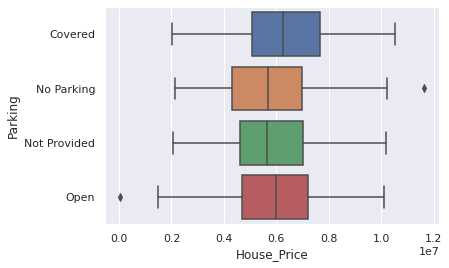

In [ ]:
p = sns.boxplot(x="House_Price", y="Parking", data=price2)

In [ ]:
Q1 = price2['House_Price'].quantile(0.25)
Q3 = price2['House_Price'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

overprice = (price2['House_Price'] > (Q3 + 1.5 *IQR))
op = price2.loc[overprice]
op

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
678,7288.0,9560.0,12531.0,1989.0,2414.0,No Parking,CAT A,860,11632000


# Bagian 2


Mengeluarkan Outlier dari harga rumah berdasarkan ketersediaan tempat parkir dan kategori rumah.

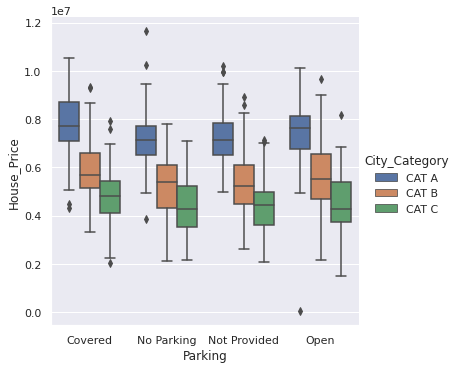

In [ ]:
p = sns.catplot(x="Parking", y="House_Price", hue="City_Category", kind="box", data=price2)

In [ ]:
percobaan = price2.copy()
percobaan['Id'] = range(len(percobaan))
percobaan.set_index(['Parking', 'City_Category', 'Id'], inplace=True)

In [ ]:
percobaan.sample(5)

Dist_Taxi  Dist_Market  ...  Rainfall  House_Price
Parking    City_Category Id                           ...                       
Covered    CAT B         562     5876.0      13703.0  ...       810      4347000
Open       CAT B         12      7693.0       9130.0  ...      1050      6047000
                         626     5985.0      12402.0  ...       830      5913000
No Parking CAT B         531     5584.0      10514.0  ...       890      2784000
Open       CAT A         275     7653.0      11521.0  ...      1120      7040000

[5 rows x 7 columns]

In [ ]:
park = ['Covered', 'No Parking', 'Not Provided', 'Open']
cat = ['CAT A', 'CAT B', 'CAT C']

murah = pd.DataFrame(columns=('Id', 'Dist_Taxi',	'Dist_Market',	'Dist_Hospital',	'Carpet',	'Builtup',	'Rainfall',	'House_Price')).set_index('Id')

for i in park:
  for j in cat:
    try:
      Q1 = percobaan.loc[i, j]['House_Price'].quantile(0.25)
      Q3 = percobaan.loc[i, j]['House_Price'].quantile(0.75)
      IQR = Q3 - Q1
      print('outlier bawah tipe {} dan {}'.format(i,j))
      a = percobaan[percobaan.House_Price < (Q1 - 1.5* IQR)].loc[i, j]
      print(a)
      murah = murah.append(a)
    except:
      print('tidak ada')

outlier bawah tipe Covered dan CAT A
     Dist_Taxi  Dist_Market  Dist_Hospital  ...  Builtup  Rainfall  House_Price
Id                                          ...                                
320    11240.0       9781.0        15232.0  ...   1813.0       520      4496000
874     9997.0      12349.0        13043.0  ...   1606.0       770      4303000

[2 rows x 7 columns]
outlier bawah tipe Covered dan CAT B
tidak ada
outlier bawah tipe Covered dan CAT C
     Dist_Taxi  Dist_Market  Dist_Hospital  ...  Builtup  Rainfall  House_Price
Id                                          ...                                
621     4619.0      10768.0        11787.0  ...   1946.0       870      2027000

[1 rows x 7 columns]
outlier bawah tipe No Parking dan CAT A
     Dist_Taxi  Dist_Market  Dist_Hospital  ...  Builtup  Rainfall  House_Price
Id                                          ...                                
408     8773.0      13547.0        15551.0  ...   1799.0       960      386

In [ ]:
murah['keterangan'] = 'underprice'
murah

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price,keterangan
Id,,,,,,,,
320,11240.0,9781.0,15232.0,1523.0,1813.0,520,4496000,underprice
874,9997.0,12349.0,13043.0,1350.0,1606.0,770,4303000,underprice
621,4619.0,10768.0,11787.0,1624.0,1946.0,870,2027000,underprice
408,8773.0,13547.0,15551.0,1509.0,1799.0,960,3860000,underprice
810,NaN,NaN,NaN,NaN,NaN,440,30000,underprice


In [ ]:
mahal = pd.DataFrame(columns=('Id', 'Dist_Taxi',	'Dist_Market',	'Dist_Hospital',	'Carpet',	'Builtup',	'Rainfall',	'House_Price')).set_index('Id')

for i in park:
  for j in cat:
    try:
      Q1 = percobaan.loc[i, j]['House_Price'].quantile(0.25)
      Q3 = percobaan.loc[i, j]['House_Price'].quantile(0.75)
      IQR = Q3 - Q1
      print('outlier atas tipe {} dan {}'.format(i,j))
      b = percobaan[percobaan.House_Price > (Q3 + 1.5* IQR)].loc[i, j]
      print(b)
      mahal = mahal.append(b)
    except:
      print('tidak ada')

outlier atas tipe Covered dan CAT A
tidak ada
outlier atas tipe Covered dan CAT B
     Dist_Taxi  Dist_Market  Dist_Hospital  ...  Builtup  Rainfall  House_Price
Id                                          ...                                
724    10989.0      13153.0        13797.0  ...   1958.0       530      9336000
762     8274.0      11673.0        13345.0  ...   1999.0       950      9300000

[2 rows x 7 columns]
outlier atas tipe Covered dan CAT C
     Dist_Taxi  Dist_Market  Dist_Hospital  ...  Builtup  Rainfall  House_Price
Id                                          ...                                
781     8618.0      10717.0        12286.0  ...   1979.0       480      7580000
846     8740.0      10899.0        13447.0  ...   2252.0       330      7931000

[2 rows x 7 columns]
outlier atas tipe No Parking dan CAT A
     Dist_Taxi  Dist_Market  Dist_Hospital  ...  Builtup  Rainfall  House_Price
Id                                          ...                                

In [ ]:
mahal['keterangan'] = 'overprice'
mahal

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price,keterangan
Id,,,,,,,,
724,10989.0,13153.0,13797.0,1645.0,1958.0,530,9336000,overprice
762,8274.0,11673.0,13345.0,1641.0,1999.0,950,9300000,overprice
781,8618.0,10717.0,12286.0,1660.0,1979.0,480,7580000,overprice
846,8740.0,10899.0,13447.0,1873.0,2252.0,330,7931000,overprice
427,16233.0,15074.0,18566.0,1303.0,1587.0,1310,10231000,overprice
677,7288.0,9560.0,12531.0,1989.0,2414.0,860,11632000,overprice
175,5754.0,6031.0,9745.0,1465.0,1763.0,680,9957000,overprice
721,8499.0,7295.0,13189.0,1548.0,1858.0,480,9948000,overprice
788,12262.0,12066.0,13268.0,1486.0,1758.0,820,10182000,overprice


In [ ]:
price2['Id'] = range(len(price2))
price2.set_index('Id')

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
Id,,,,,,,,,
0,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000
...,...,...,...,...,...,...,...,...,...
926,12176.0,8518.0,15673.0,1582.0,1910.0,Covered,CAT C,1080,6639000
927,7214.0,8717.0,10553.0,1387.0,1663.0,Open,CAT A,850,8208000
928,7423.0,11708.0,13220.0,1200.0,1436.0,Open,CAT A,1060,7644000


In [ ]:
outliers_price = murah.append(mahal)
outliers_price = outliers_price.merge(price2, how='left').set_index('Id').sort_index()
outliers_price

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price,keterangan,Parking,City_Category
Id,,,,,,,,,,
175,5754.0,6031.0,9745.0,1465.0,1763.0,680,9957000,overprice,Not Provided,CAT A
256,10100.0,11800.0,14304.0,1185.0,1418.0,1150,8931000,overprice,Not Provided,CAT B
320,11240.0,9781.0,15232.0,1523.0,1813.0,520,4496000,underprice,Covered,CAT A
346,9119.0,11639.0,14374.0,1633.0,1968.0,330,8147000,overprice,Open,CAT C
408,8773.0,13547.0,15551.0,1509.0,1799.0,960,3860000,underprice,No Parking,CAT A
427,16233.0,15074.0,18566.0,1303.0,1587.0,1310,10231000,overprice,No Parking,CAT A
464,7753.0,8307.0,13508.0,1628.0,1959.0,890,7148000,overprice,Not Provided,CAT C
621,4619.0,10768.0,11787.0,1624.0,1946.0,870,2027000,underprice,Covered,CAT C
677,7288.0,9560.0,12531.0,1989.0,2414.0,860,11632000,overprice,No Parking,CAT A


# Bagian 3



Kerjakan soal berikut:

In [ ]:
tips = sns.load_dataset('tips')
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
138,16.00,2.00,Male,Yes,Thur,Lunch,2
193,15.48,2.02,Male,Yes,Thur,Lunch,2
147,11.87,1.63,Female,No,Thur,Lunch,2
227,20.45,3.00,Male,No,Sat,Dinner,4
222,8.58,1.92,Male,Yes,Fri,Lunch,1


1. Adakah tipe variabel yang kurang tepat di data tersebut?

In [ ]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [ ]:
tips['size'] = tips['size'].astype('category')

Jawab :

Ada, yaitu variabel size seharusnya bertipe kategori, karena variabel ini menunjukkan jumlah pengunjung dalam 1 bill.

2. Apakah data numeriknya cenderung berdistribusi normal?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f341f3b1fd0>,
      dtype=object)

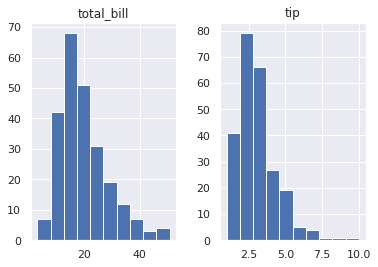

In [ ]:
tips[['total_bill', 'tip']].hist(figsize=(6, 4), layout=(1, 2))

Jawab:

Berdasarkan histogram di atas dapat dilihat bahwa variabelnya tidak berdistribusi normal (cenderung miring kiri)

3. Apakah ada outlier, noise, missing values, dan-atau duplikasi data?

total_bill       AxesSubplot(0.125,0.536818;0.0945122x0.343182)
tip           AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
dtype: object

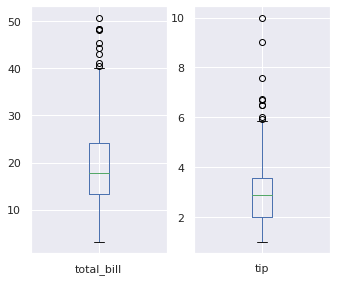

In [ ]:
tips.plot(kind='box', subplots=True, layout=(2,7),
           sharex=False, sharey=False, figsize=(20, 10))

In [ ]:
for col in tips.columns:
  if tips[col].dtypes=='float64':
    print('\n noise pada variabel',col)
    print(tips[tips[col]<0])
  else:
    print('\n variabel',col)
    print('isinya: \n',tips[col].value_counts()) 


 noise pada variabel total_bill
Empty DataFrame
Columns: [total_bill, tip, sex, smoker, day, time, size]
Index: []

 noise pada variabel tip
Empty DataFrame
Columns: [total_bill, tip, sex, smoker, day, time, size]
Index: []

 variabel sex
isinya: 
 Male      157
Female     87
Name: sex, dtype: int64

 variabel smoker
isinya: 
 No     151
Yes     93
Name: smoker, dtype: int64

 variabel day
isinya: 
 Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

 variabel time
isinya: 
 Dinner    176
Lunch      68
Name: time, dtype: int64

 variabel size
isinya: 
 2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64


In [ ]:
print('jumlah missing value :', tips.isnull().sum().sum())

jumlah missing value : 0


In [ ]:
print('jumlah duplikasi data :', tips.duplicated().sum())
print('baris yang memiliki duplikasi adalah :')
tips[tips.duplicated(keep=False)]

jumlah duplikasi data : 1
baris yang memiliki duplikasi adalah :


,total_bill,tip,sex,smoker,day,time,size
198,13.0,2.0,Female,Yes,Thur,Lunch,2
202,13.0,2.0,Female,Yes,Thur,Lunch,2


In [ ]:
tips.drop_duplicates(inplace=True)

Jawab :
- Berdasarkan boxplot di atas dapat dilihat bahwa terdapat outlier pada tiap variabel yang numerik
- Tidak terdapat noise pada tiap variabel, karena tidak ada tip dan total_bill yang benilai negatif. Serta untuk variabel kategori semuanya masih sesuai.

- Tidak terdapat missing values pada dataset tersebut

- Terdapat duplikasi data pada index ke 198 dan 202

4. Apakah pelanggan pria dan wanita cenderung proporsional (balance)?

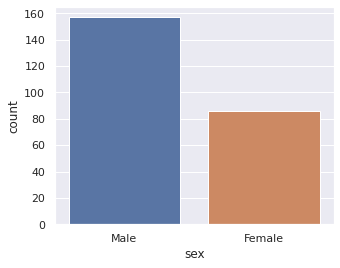

In [ ]:
plt.figure(figsize=(5,4))
p = sns.countplot(x="sex", data=tips)

Jawab :

Proporsi pelanggan pria cenderung lebih banyak dari pelanggan wanita (tidak balance) 

5. Dari data yang ada apakah Pria atau wanita ada kecenderungan memberi tips lebih besar?

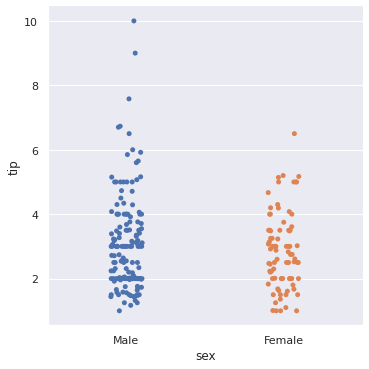

In [ ]:
sns.catplot(y='tip', x='sex', data=tips)

Jawab :

Secara sekilas, sebaran data tip pada pria dan wanita cenderung sama. Namun, ada sebagian dari data pria yang memberikan tip lebih besar dibanding yang lainnya

6. Dari data yang ada apakah ada kecenderungan tips lebih besar di hari-hari tertentu?

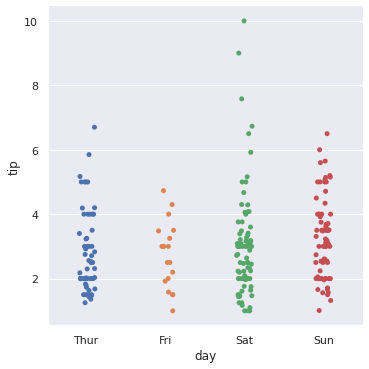

In [ ]:
sns.catplot(y='tip', x='day', data=tips)

Jawab :

Secara sekilas, sebaran data tip pada setiap hari operasioal cenderung sama. Namun, ada sebagian dari data pengunjung dihari sabtu yang memberikan tip lebih besar dibanding yang lainnya

7. Dari data yang ada apakah customer perokok cenderung memberi tips lebih besar?

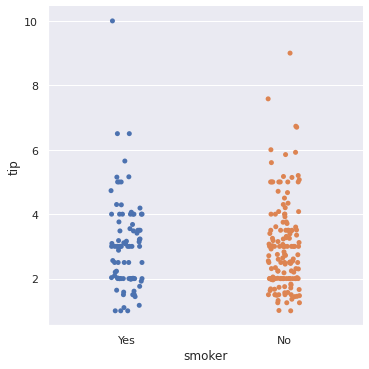

In [ ]:
sns.catplot(y='tip', x='smoker', data=tips)

Jawab : 

Secara sekilas, sebaran data tip pada pengunjung perokok dan bukan perokok cenderung sama. 

8. Apakah pola di nomer 5 dan 7 dipengaruhi hari?

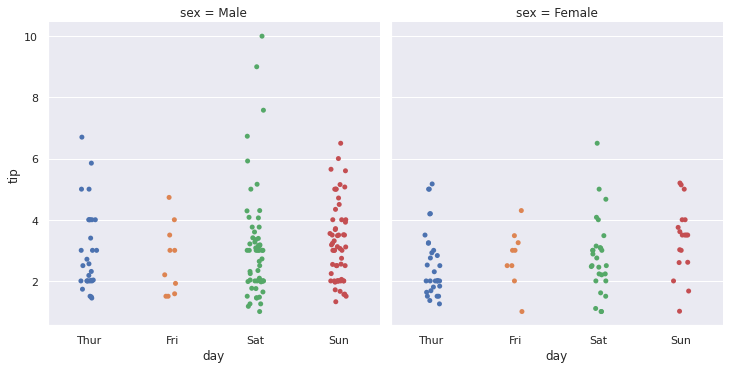

In [ ]:
sns.catplot(x='day', col='sex', y='tip', data=tips)

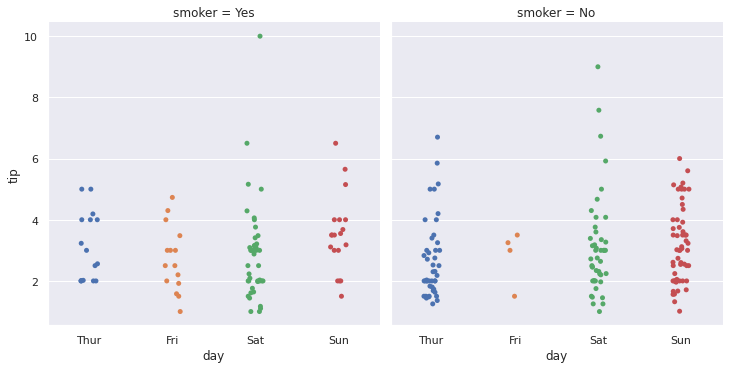

In [ ]:
sns.catplot(x='day', col='smoker', y='tip', data=tips)

Jawab :

Berdasarkan grafik tersebut, pola 5 dan 7 cenderung tidak dipengaruhi oleh hari. Namun pada hari Sabtu beberapa pengunjung memberikan tips yang besar dari biasanya.

9. Pola apalagi yang dapat anda temukan? (misal, bisakah anda menyarankan tata letak kursi/meja restaurant dari data ini?)

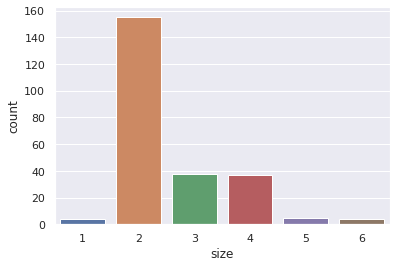

In [ ]:
p = sns.countplot(x="size", data=tips)

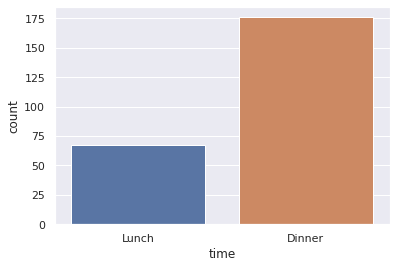

In [ ]:
p = sns.countplot(x="time", data=tips)

Jawab :

- Dapat dilihat bahwa jumlah pengunjung yang datang berdua cenderung lebih banyak dibanding yang lainnya
- Pengunjung yang datang diwaktu makan malam lebih banyak dibanding saat makan siang

10. Final question: dari hasil EDA anda saran apa saja yang akan anda berikan ke pemilik restaurant?

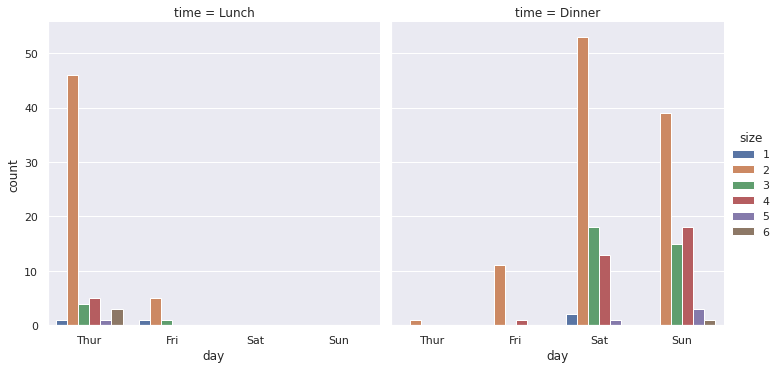

In [ ]:
ax = sns.catplot(x = 'day', hue = 'size', col = 'time', kind='count', data=tips)

Jawab :

Disarankan untuk 
- lebih memperbanyak stok pada weekend
- mencoba memberikan promo menarik diwaktu makan siang agar lebih banyak pengunjung yang datang
- lebih banyak menata kursi untuk 2 orang
- lebih memperluas area untuk non-smoking, dibanding smoking area
- memberikan live music atau hiburan saat malam weekend